In [1]:
import time 
import datetime
import json, csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN
import scipy.stats as stats
from pandas import Series, DataFrame

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

#warnings.filterwarnings('ignore')


In [2]:
df = pd.read_json('history.city.list.json')

#normdf  = pd.io.json.json_normalize(df)
#df.head()

In [3]:
# create a list of URLs to call the API at 1 month intervals 

from datetime import datetime
from dateutil.rrule import rrule, DAILY, MONTHLY

now = datetime.now() # current date and time

#YMD

dates = (list(rrule(MONTHLY, dtstart=datetime(2014, 1, 1), until=datetime(2014,4,30))))
dates =  [date.__str__() for date in dates]
dates = [date.replace('-','') for date in dates]
dates = [date.replace(' 00:00:00','') for date in dates]


url_dates = []
# 'Date=20150105&endDate=20150204'
url_dates = []
for i in range(len(dates)-1):
    url_dates.append('https://api.weather.com/v1/geocode/40.188468/-76.775258/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate={}&endDate={}&units=e'.format(dates[i],dates[i+1]))
    
#print(url_dates)


['https://api.weather.com/v1/geocode/40.188468/-76.775258/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20140101&endDate=20140201&units=e', 'https://api.weather.com/v1/geocode/40.188468/-76.775258/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20140201&endDate=20140301&units=e', 'https://api.weather.com/v1/geocode/40.188468/-76.775258/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20140301&endDate=20140401&units=e']


In [4]:
# Importing in each cell because of the kernel restarts.
import scrapy
from scrapy.crawler import CrawlerProcess


class ESSpider(scrapy.Spider):
    # Naming the spider is important if you are running more than one spider of
    # this class simultaneously.
    name = "weathertest3 harrisburg"
    
    # URL(s) to start with.
    start_urls = url_dates
    #[
        #url_dates
        #'https://api.weather.com/v1/geocode/40.188468/-76.775258/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=19701230&endDate=19701231&units=e'
        #'https://www.wunderground.com/history/daily/us/pa/middletown/KMDT/date/2020-3-18']
#33°06777954N, 96°0652771W
   # ]
#40.188468, -76.775258
    def parse(self, response):
        #data = json.load(f)
        with open('weather_3monthstest.json', 'wb') as f:
            f.write(response.body)

# Instantiate our crawler.
process = CrawlerProcess()

# Start the crawler with our spider.
process.crawl(ESSpider)
process.start()

2020-03-26 12:57:09 [scrapy.utils.log] INFO: Scrapy 2.0.1 started (bot: scrapybot)
2020-03-26 12:57:09 [scrapy.utils.log] INFO: Versions: lxml 4.4.1.0, libxml2 2.9.9, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 19.10.0, Python 3.7.4 (default, Aug 13 2019, 15:17:50) - [Clang 4.0.1 (tags/RELEASE_401/final)], pyOpenSSL 19.0.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.7, Platform Darwin-19.4.0-x86_64-i386-64bit
2020-03-26 12:57:09 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2020-03-26 12:57:09 [scrapy.crawler] INFO: Overridden settings:
{}
2020-03-26 12:57:09 [scrapy.extensions.telnet] INFO: Telnet Password: d406f8de84757a45
2020-03-26 12:57:09 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2020-03-26 12:57:09 [scrapy.middleware] INFO: Enabled downloader middlewares:
['sc

In [9]:
with open('weather_3monthstest.json') as f:
    data = json.load(f)
    #print(data["observations"])
    
    
    

In [10]:
weather_df = pd.DataFrame(data["observations"])

In [11]:
weather_df['time_dif']= weather_df['valid_time_gmt']-weather_df['expire_time_gmt']
weather_df['timeA']= weather_df['valid_time_gmt'].diff(periods=1)
weather_df['timeB'] = pd.to_datetime(weather_df['valid_time_gmt'],utc=True)
weather_df['timeC'] = pd.to_datetime(weather_df['valid_time_gmt'],unit='s')

weather_df.insert(2,'date/time',pd.to_datetime(weather_df['expire_time_gmt'],unit='s'))


#https://www.worldcommunitygrid.org/lt/images/climate/The_Weather_Company_APIs.pdf

#https://www.utctime.net/gmt-time-now
#https://www.epochconverter.com/

#2015/01/05&endDate=2015/02/04


2020-03-26 12:59:20 [numexpr.utils] INFO: NumExpr defaulting to 8 threads.


In [13]:
weather_df

,key,class,date/time,expire_time_gmt,obs_id,obs_name,valid_time_gmt,day_ind,temp,wx_icon,icon_extd,wx_phrase,pressure_tend,pressure_desc,dewPt,heat_index,rh,pressure,vis,wc,wdir,wdir_cardinal,gust,wspd,max_temp,min_temp,precip_total,precip_hrly,snow_hrly,uv_desc,feels_like,uv_index,qualifier,qualifier_svrty,blunt_phrase,terse_phrase,clds,water_temp,primary_wave_period,primary_wave_height,primary_swell_period,primary_swell_height,primary_swell_direction,secondary_swell_period,secondary_swell_height,secondary_swell_direction,time_dif,timeA,timeB,timeC
0,KMDT,observation,2014-02-01 06:56:00,1391237760,KMDT,Harrisburg/Intl,1391230560,N,29,27.0,2700,Mostly Cloudy,NaN,None,22.0,29.0,75,29.88,8.00,29.0,NaN,CALM,NaN,NaN,36.0,28.0,None,NaN,NaN,Low,29.0,0,None,None,None,None,BKN,None,None,None,None,None,None,None,None,None,-7200,NaN,1970-01-01 00:00:01.391230560+00:00,2014-02-01 04:56:00
1,KMDT,observation,2014-02-01 07:56:00,1391241360,KMDT,Harrisburg/Intl,1391234160,N,26,27.0,2700,Mostly Cloudy,NaN,None,19.0,26.0,75,29.88,8.00,26.0,NaN,CALM,NaN,NaN,35.0,26.0,None,NaN,NaN,Low,26.0,0,None,None,None,None,BKN,None,None,None,None,None,None,None,None,None,-7200,3600.0,1970-01-01 00:00:01.391234160+00:00,2014-02-01 05:56:00
2,KMDT,observation,2014-02-01 08:56:00,1391244960,KMDT,Harrisburg/Intl,1391237760,N,26,27.0,2700,Mostly Cloudy,NaN,None,21.0,26.0,81,29.89,8.00,26.0,NaN,CALM,NaN,NaN,NaN,NaN,None,NaN,NaN,Low,26.0,0,None,None,None,None,BKN,None,None,None,None,None,None,None,None,None,-7200,3600.0,1970-01-01 00:00:01.391237760+00:00,2014-02-01 06:56:00
3,KMDT,observation,2014-02-01 09:56:00,1391248560,KMDT,Harrisburg/Intl,1391241360,N,27,26.0,2600,Cloudy,NaN,None,21.0,27.0,78,29.88,8.00,27.0,120.0,ESE,NaN,3.0,NaN,NaN,None,NaN,NaN,Low,27.0,0,None,None,None,None,OVC,None,None,None,None,None,None,None,None,None,-7200,3600.0,1970-01-01 00:00:01.391241360+00:00,2014-02-01 07:56:00
4,KMDT,observation,2014-02-01 10:56:00,1391252160,KMDT,Harrisburg/Intl,1391244960,N,28,26.0,2600,Cloudy,1.0,Rising Rapidly,22.0,28.0,78,29.91,8.00,28.0,NaN,CALM,NaN,NaN,NaN,NaN,None,NaN,NaN,Low,28.0,0,None,None,None,None,OVC,None,None,None,None,None,None,None,None,None,-7200,3600.0,1970-01-01 00:00:01.391244960+00:00,2014-02-01 08:56:00
5,KMDT,observation,2014-02-01 11:56:00,1391255760,KMDT,Harrisburg/Intl,1391248560,N,28,26.0,2600,Cloudy,NaN,None,22.0,28.0,78,29.92,8.00,28.0,NaN,CALM,NaN,NaN,NaN,NaN,None,NaN,NaN,Low,28.0,0,None,None,None,None,OVC,None,None,None,None,None,None,None,None,None,-7200,3600.0,1970-01-01 00:00:01.391248560+00:00,2014-02-01 09:56:00
6,KMDT,observation,2014-02-01 12:56:00,1391259360,KMDT,Harrisburg/Intl,1391252160,N,26,26.0,2600,Cloudy,NaN,None,20.0,26.0,78,29.94,8.00,26.0,NaN,VAR,NaN,3.0,NaN,NaN,None,NaN,NaN,Low,26.0,0,None,None,None,None,OVC,None,None,None,None,None,None,None,None,None,-7200,3600.0,1970-01-01 00:00:01.391252160+00:00,2014-02-01 10:56:00
7,KMDT,observation,2014-02-01 13:56:00,1391262960,KMDT,Harrisburg/Intl,1391255760,N,28,26.0,2600,Cloudy,1.0,Rising,21.0,28.0,75,29.95,8.00,28.0,80.0,E,NaN,3.0,29.0,24.0,None,NaN,NaN,Low,28.0,0,None,None,None,None,OVC,None,None,None,None,None,None,None,None,None,-7200,3600.0,1970-01-01 00:00:01.391255760+00:00,2014-02-01 11:56:00
8,KMDT,observation,2014-02-01 14:56:00,1391266560,KMDT,Harrisburg/Intl,1391259360,N,28,27.0,2700,Mostly Cloudy,NaN,None,21.0,28.0,75,29.95,4.00,28.0,NaN,CALM,NaN,NaN,NaN,NaN,None,NaN,NaN,None,28.0,-3,None,None,None,None,BKN,None,None,None,None,None,None,None,None,None,-7200,3600.0,1970-01-01 00:00:01.391259360+00:00,2014-02-01 12:56:00
9,KMDT,observation,2014-02-01 15:56:00,1391270160,KMDT,Harrisburg/Intl,1391262960,D,31,28.0,2800,Mostly Cloudy,NaN,None,24.0,31.0,76,29.95,4.00,31.0,NaN,CALM,NaN,NaN,NaN,NaN,None,NaN,NaN,None,31.0,-19,None,None,None,None,BKN,None,None,None,None,None,None,None,None,None,-7200,3600.0,1970-01-01 00:00:01.391262960+00:00,2014-02-01 13:56:00


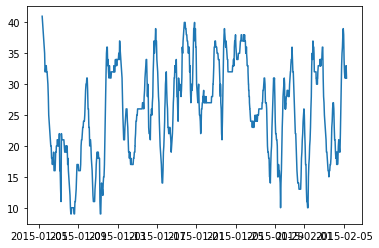

In [50]:
plt.plot(weather_df['date/time'],weather_df['temp'])

https://api.weather.com/v1/geocode/33.06777954/-96.0652771/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20150105&endDate=20150105&units=e

https://api.weather.com/v1/geocode/33.06777954/-96.0652771/observations/historical.json?apiKey=6532d6454b8aa370768e63d6ba5a832e&startDate=20150105&endDate=20150204&units=e